In [1]:
import sys
sys.path.append("/Users/anirudhnatarajan/Documents/UPenn/McNeuron")
import McNeuron
import pickle
from random import randint
import numpy as np
import matplotlib.pyplot as plt
import plotly
plotly.tools.set_credentials_file(username='anirudhn',
                                 api_key='uaV7Q410noAGBd4zvNTS')
%matplotlib inline  

In [2]:
tree_data = pickle.load(open('.././trees/tree_data.csv', 'rb'))

In [3]:
trees = tree_data.sort_values(['location'])
trees = trees.reset_index(drop=True)

In [4]:
index = 12
swc = trees['swc'][index]
swc[:, 1] = 2
swc[0, 1] = 1
tree = McNeuron.Neuron(swc)
tree.basic_features()


In [5]:
#McNeuron.visualize.plot_3D(tree)

In [6]:
branches = np.where(tree.features['branch order']>=2)
size = len(branches[0])
print(size)
subsets = [0] * size
for i in range(0,size) :
    rest_swc = tree.get_rest_of_neuron_after_node(i)
    n = McNeuron.Neuron(rest_swc)
    n.l_measure_features()
    subsets[i] = n.getNeuronVector()
    if i%100==0 :
        print(i)
subsets = np.vstack(subsets)

796
0


/Users/anirudhnatarajan/Documents/UPenn/McNeuron/McNeuron/Neuron.py:1021: RuntimeWarning:

invalid value encountered in true_divide

/Users/anirudhnatarajan/Documents/UPenn/McNeuron/McNeuron/Neuron.py:1022: RuntimeWarning:

invalid value encountered in true_divide

/Users/anirudhnatarajan/Documents/UPenn/McNeuron/McNeuron/Neuron.py:1023: RuntimeWarning:

invalid value encountered in true_divide



100
200
300
400
500
600
700


In [10]:
for i in range(0,len(subsets)) :
    if(np.isnan(subsets[i][50])) :
        for j in range (22,52) :
            subsets[i,j] = 0
print(len(subsets))

796


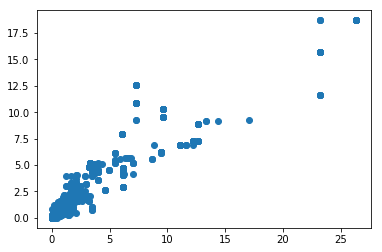

In [11]:
plt.scatter(subsets[:,0], subsets[:,1])

<Container object of 3 artists>

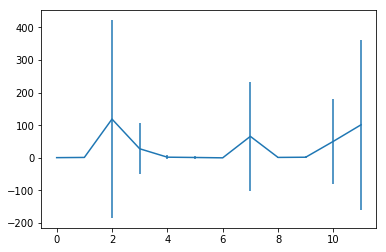

In [19]:
m = np.mean(subsets,axis=0)
s = np.std(subsets,axis=0)
plt.errorbar(range(12), m[10:22], s[10:22])